# Clustered Customer 
**Table of Contents**  
- [1. Introduction](#1.-Introduction)  
- [2. Preprocessing Data](#2.-Preprocessing-Data)    
- [3. Data and Methods](#3.-Data-and-Methods)  
- [4. Exploratory Data Analysis](#4.-Exploratory-Data-Analysis)  
    - [4.1. Average monthly purchases and Cash Advance Amount]() 
    - [4.2. What type of purchases customers are making on credit card ?]() 
- [5. Model Building](#5.-Model-Building)
    - [5.1 Feature Engineering](#5.1-Feature-Engineering)
    - [5.2 Model Training](#5.2-Model-Training)
- [6. Discussion & Conclusion]()

# [1. Introduction]()

This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 12 months. The dataset is at a customer level with 18 behavioral variables. This study also aims to see Unsupervised Machine Learning Methods on the same data set.

## [2. Data Preprocessing]()

In [31]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from typing import Dict, List
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve, auc, \
    roc_auc_score, roc_curve, PrecisionRecallDisplay, RocCurveDisplay, average_precision_score
import pickle
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')

Load the dataset

In [32]:
def read_data(path: str) -> pd.DataFrame:
    with open(path) as x:
        ncols = len(x.readline().split(','))
    df = pd.read_csv(path, usecols=range(1, ncols))

    return df

path = 'Clustered_Customer_Data.csv'
data = read_data(path)

In [33]:
def preprocessing(df: pd.DataFrame) -> pd.DataFrame:
    df.dropna(inplace=True)
    df.drop_duplicates(inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df
data = preprocessing(data)

# [3. Data and Methods]()

### ```Information about dataset```
* **BALANCE**: Balance amount left in their account to make purchases
* **BALANCE_FREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* **PURCHASES** : Amount of purchases made from account
* **ONEOFF_PURCHASES** : Maximum purchase amount done in one-go
* **INSTALLMENTS_PURCHASES** : Amount of purchase done in installment
* **CASH_ADVANCE** : Cash in advance given by the user
* **PURCHASES_FREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* **ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* **PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* **CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid
* **CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced"
* **PURCHASES_TRX** : Numbe of purchase transactions made
* **CREDIT_LIMIT** : Limit of Credit Card for user
* **PAYMENTS** : Amount of Payment done by user
* **MINIMUM_PAYMENTS** : Minimum amount of payments made by user
* **PRCFULLPAYMENT** : Percent of full payment paid by user
* **TENURE** : Tenure of credit card service for user  
### ```Remark on the dataset```
* The dataset contain about 9000 rows and 18 columns with no duplicates or missing values. All columns are positive number 


In [34]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [36]:
data.isna().sum().to_frame(name='NULL').style.background_gradient()

,NULL
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


# [4. Exploratory Data Analysis]()

In [37]:
eda = data.copy()

Plot distribution of numerical data

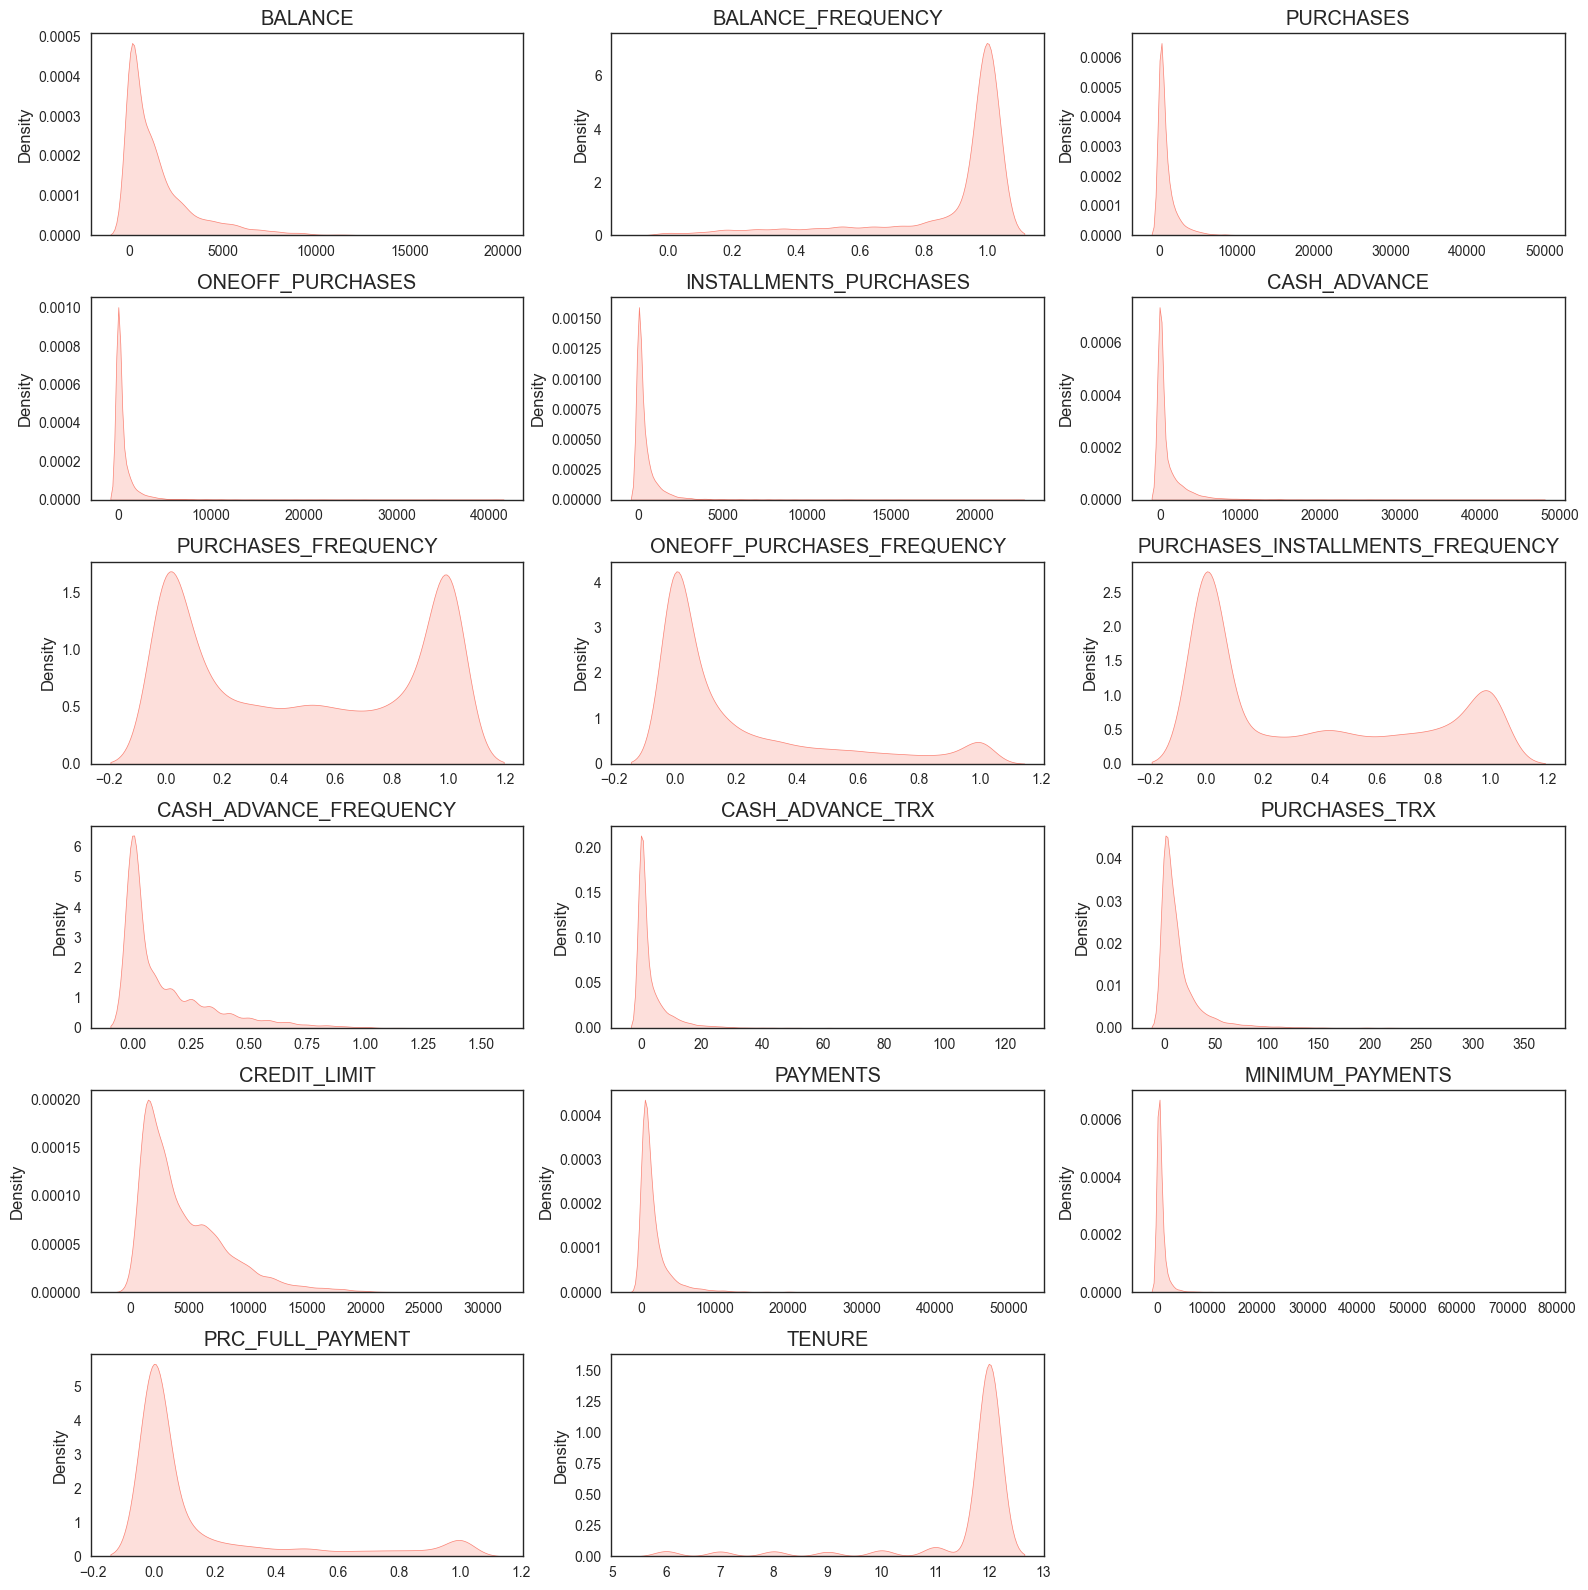

In [38]:
def plot_distribution(df: pd.DataFrame) -> None:
    fig, axes = plt.subplots(6, 3, figsize=(16,16))
    plt.style.use("ggplot")
    axes[-1, -1].axis('off')
    for col, ax in zip(df.columns.delete(-1), axes.flatten()):
        sns.kdeplot(x=df[col], color='salmon', ax=ax, fill=True)
        ax.set_xlabel('')
        ax.set_title(col)
        # ax.set_xticks([])
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.tight_layout()
plot_distribution(eda)

Plot distribution by clusters

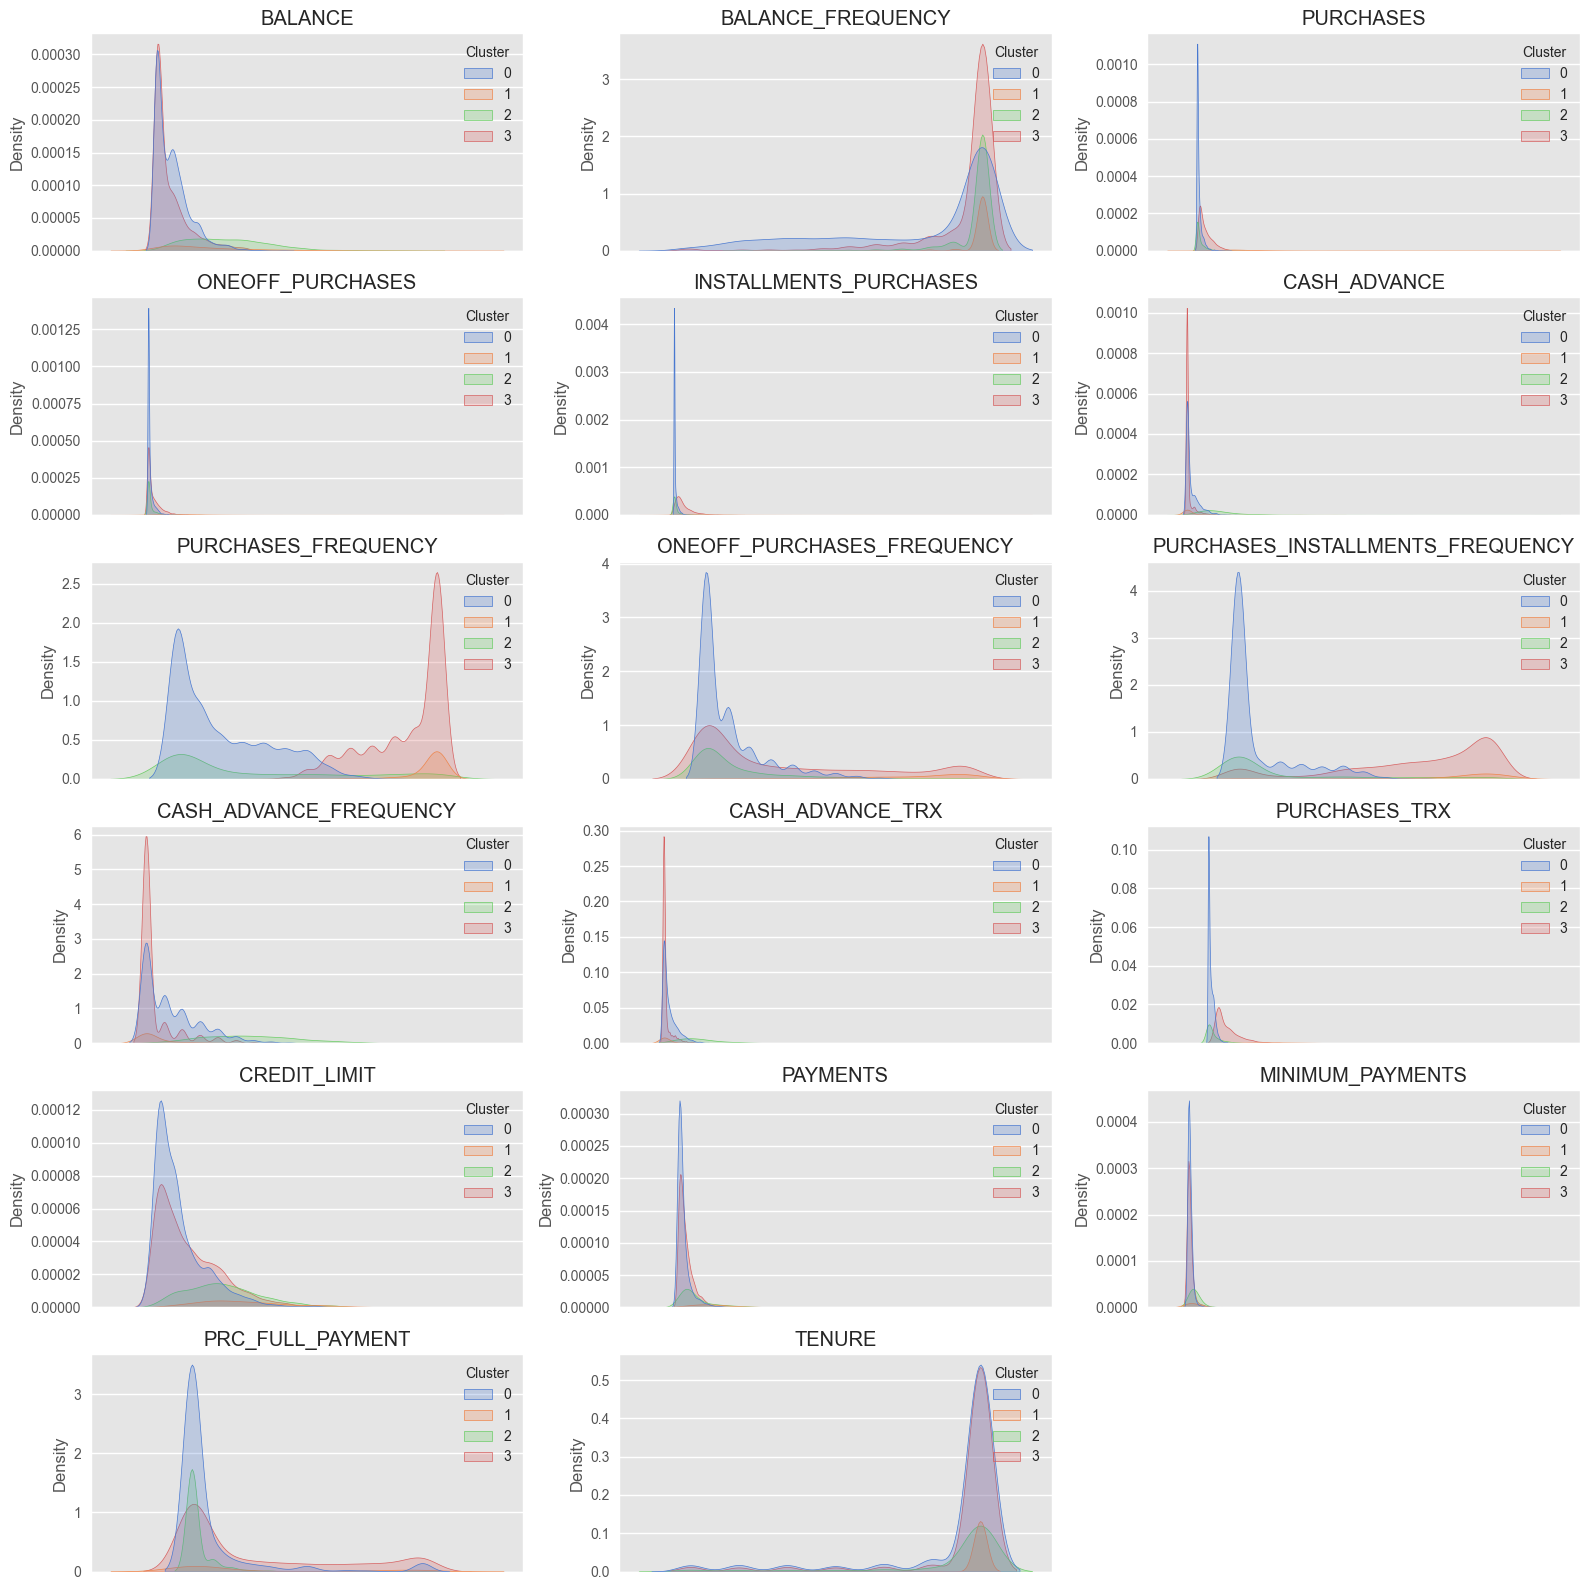

In [39]:
def plot_distribution_by_clusters(df: pd.DataFrame) -> None:
    fig, axes = plt.subplots(6, 3, figsize=(16,16))
    plt.style.use("ggplot")
    axes[-1, -1].axis('off')
    for col, ax in zip(df.columns.delete(-1), axes.flatten()):
        sns.kdeplot(x=df[col],
                    hue=df['Cluster'],
                    ax=ax,
                    palette='muted',
                    fill=True)
        ax.set_xlabel('')
        ax.set_title(col)
        ax.set_xticks([])
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.tight_layout()
plot_distribution_by_clusters(eda)

Plot basic statistics

In [40]:
def table_statistics(df: pd.DataFrame):
    return df.describe().T.style.background_gradient().set_properties(**{'font-size': '12pt',
                                                                        'width': '140px',
                                                                        'height': '15px',
                                                                        'text-align': 'center'})

table_statistics(eda)


,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.000000,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.138560
BALANCE_FREQUENCY,8950.000000,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.000000
PURCHASES,8950.000000,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.570000
ONEOFF_PURCHASES,8950.000000,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.250000
INSTALLMENTS_PURCHASES,8950.000000,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.000000
CASH_ADVANCE,8950.000000,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.211760
PURCHASES_FREQUENCY,8950.000000,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.000000,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.000000,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8950.000000,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.500000


```Remark on the table of statistics```  
- **BALANCE**: The distribution of this variable is quite wide with an average of **1564.47** and a maximum value of up to **19043.14**. The majority of values ​​are concentrated at the lower end, as indicated by the percentiles.  
- **BALANCE_FREQUENCY**: Most customers have a high balance frequency (near **1**), indicating that they regularly check or maintain balances.  
- **PURCHASES**: Very wide distribution with some very high spending customers with maximum value up to **49039.570000** while the average is only **1003.204834**.  
- **ONEOFF_PURCHASES**: Very wide distribution with and average of **592.437371** and a maximum value of up to **40761.250000**
- **INSTALLMENTS_PURCHASES**: The majority of customers spend on installments at a low average level, but there are a few who spend very large amounts.
- **CASH_ADVANCE**: Many customers do not use cash advances (median is 0), but a few withdraw very large amounts.  
- **PURCHASES_FREQUENCY**: Customers have an average shopping frequency with a fairly wide distribution.  
- **ONEOFF_PURCHASES_FREQUENCY**: Most customers rarely make single purchases.
- **PURCHASESINSTALLMENTSFREQUENCY**: Most customers have a low average frequency of installment purchases.
- **CASHADVANCEFREQUENCY**:Some values ​​of this variable exceed 1, which is unreasonable. It may be necessary to recheck data or calculation procedures.
- **CASHADVANCETRX**: Most customers do not make cash advance withdrawal transactions.
- **PURCHASES_TRX**: Customers make many purchases, with a few making a lot of purchases.  
- **CREDIT_LIMIT**: Credit limit is widely distributed with an average of 4494.45.
- **PAYMENTS**: Customers pay on average but there are some very large payments.
- **MINIMUM_PAYMENTS**: A small number of customers have very high minimum payments.
- **PRCFULLPAYMENT**: Most customers rarely pay the entire loan balance.  
- **TENURE**: Most customers have used their credit cards for 12 months or more.




Observing the distribution and outliers of the dataset

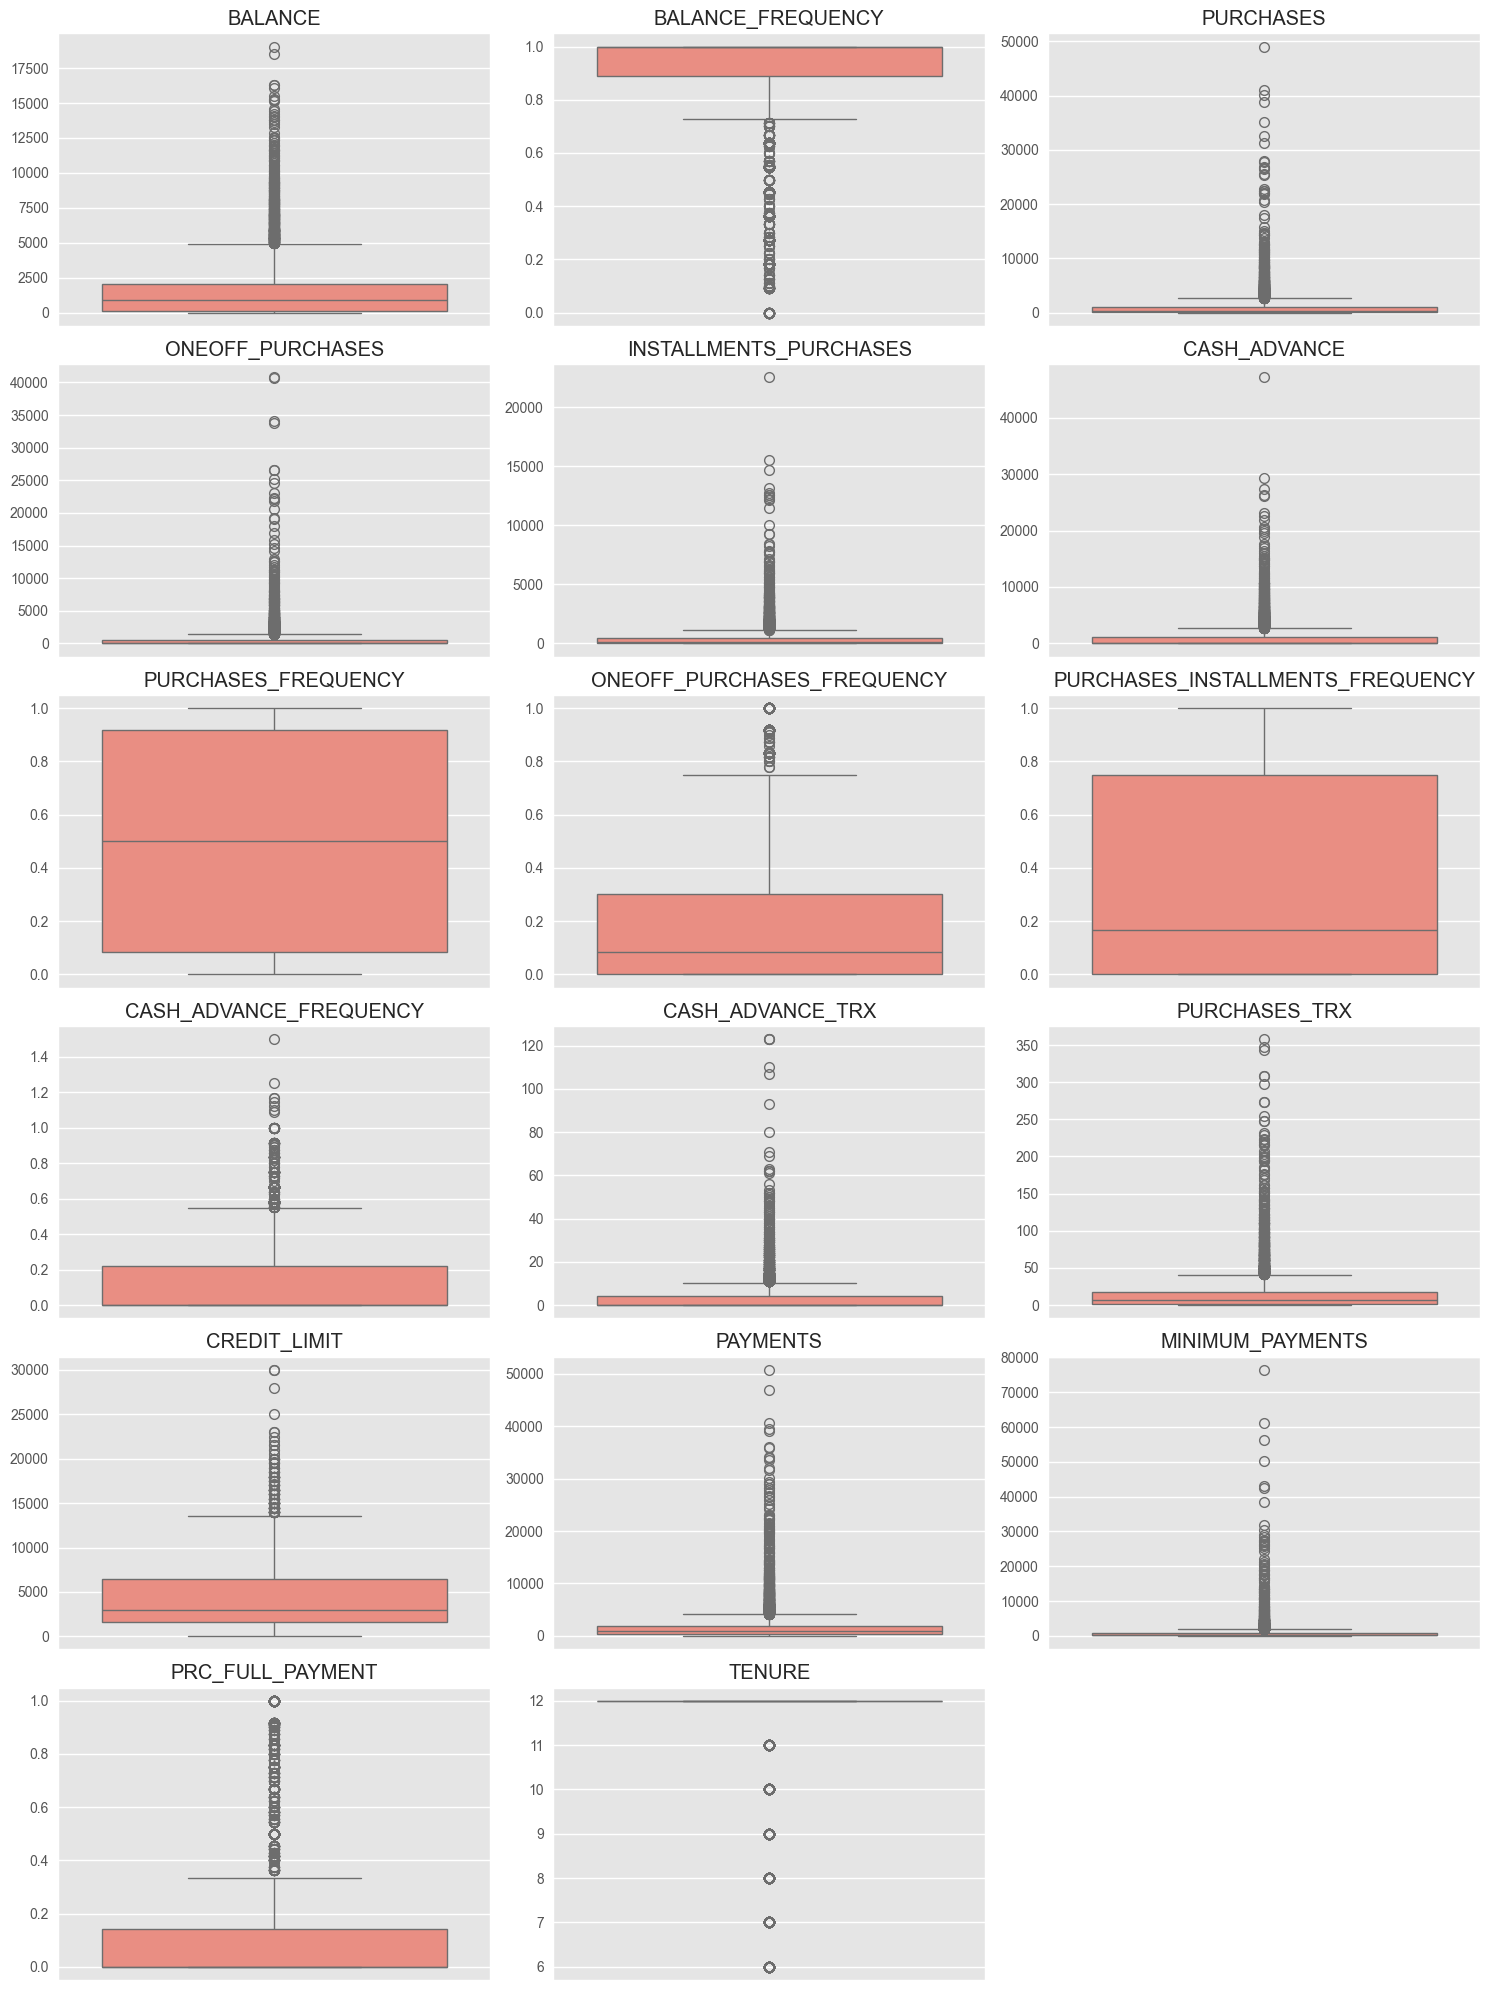

In [41]:
def boxplot_custom(df: pd.DataFrame) -> None:
    fig, axes = plt.subplots(6, 3, figsize=(15,20))
    axes[-1, -1].axis('off')
    for col, ax in zip(df.columns.delete(-1), axes.flatten()):
        sns.boxplot(df[col], ax=ax, color='salmon')
        ax.set_title(col)
        ax.set_ylabel('')

    plt.subplots_adjust(wspace=0.5, hspace=0.3)
    plt.tight_layout()
boxplot_custom(eda.copy())



From boxplot, we can observe that **'MINIMUM_PAYMENTS'** have extreme high value, that could be an error during data collection, so we will impute these value. At the same time, we also impute values ​​that we consider unusual.

In [42]:
def imputer(df: pd.DataFrame):
    df.loc[df['MINIMUM_PAYMENTS'] > 30000, 'MINIMUM_PAYMENTS'] = 30000
    df.loc[df['PURCHASES_FREQUENCY'] > 1, 'PURCHASES_FREQUENCY'] = 1
    df.loc[df['ONEOFF_PURCHASES_FREQUENCY'] > 1, 'ONEOFF_PURCHASES_FREQUENCY'] = 1
    df.loc[df['CASH_ADVANCE_FREQUENCY'] > 1, 'CASH_ADVANCE_FREQUENCY'] = 1
    df.loc[df['PAYMENTS'] > 40000, 'PAYMENTS'] = 400000

    return df

data = imputer(data)
eda = data.copy()
table_statistics(data)

    

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.000000,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.138560
BALANCE_FREQUENCY,8950.000000,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.000000
PURCHASES,8950.000000,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.570000
ONEOFF_PURCHASES,8950.000000,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.250000
INSTALLMENTS_PURCHASES,8950.000000,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.000000
CASH_ADVANCE,8950.000000,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.211760
PURCHASES_FREQUENCY,8950.000000,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.000000,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.000000,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8950.000000,0.134972,0.199257,0.000000,0.000000,0.000000,0.222222,1.000000


Plot the correlation between attributes

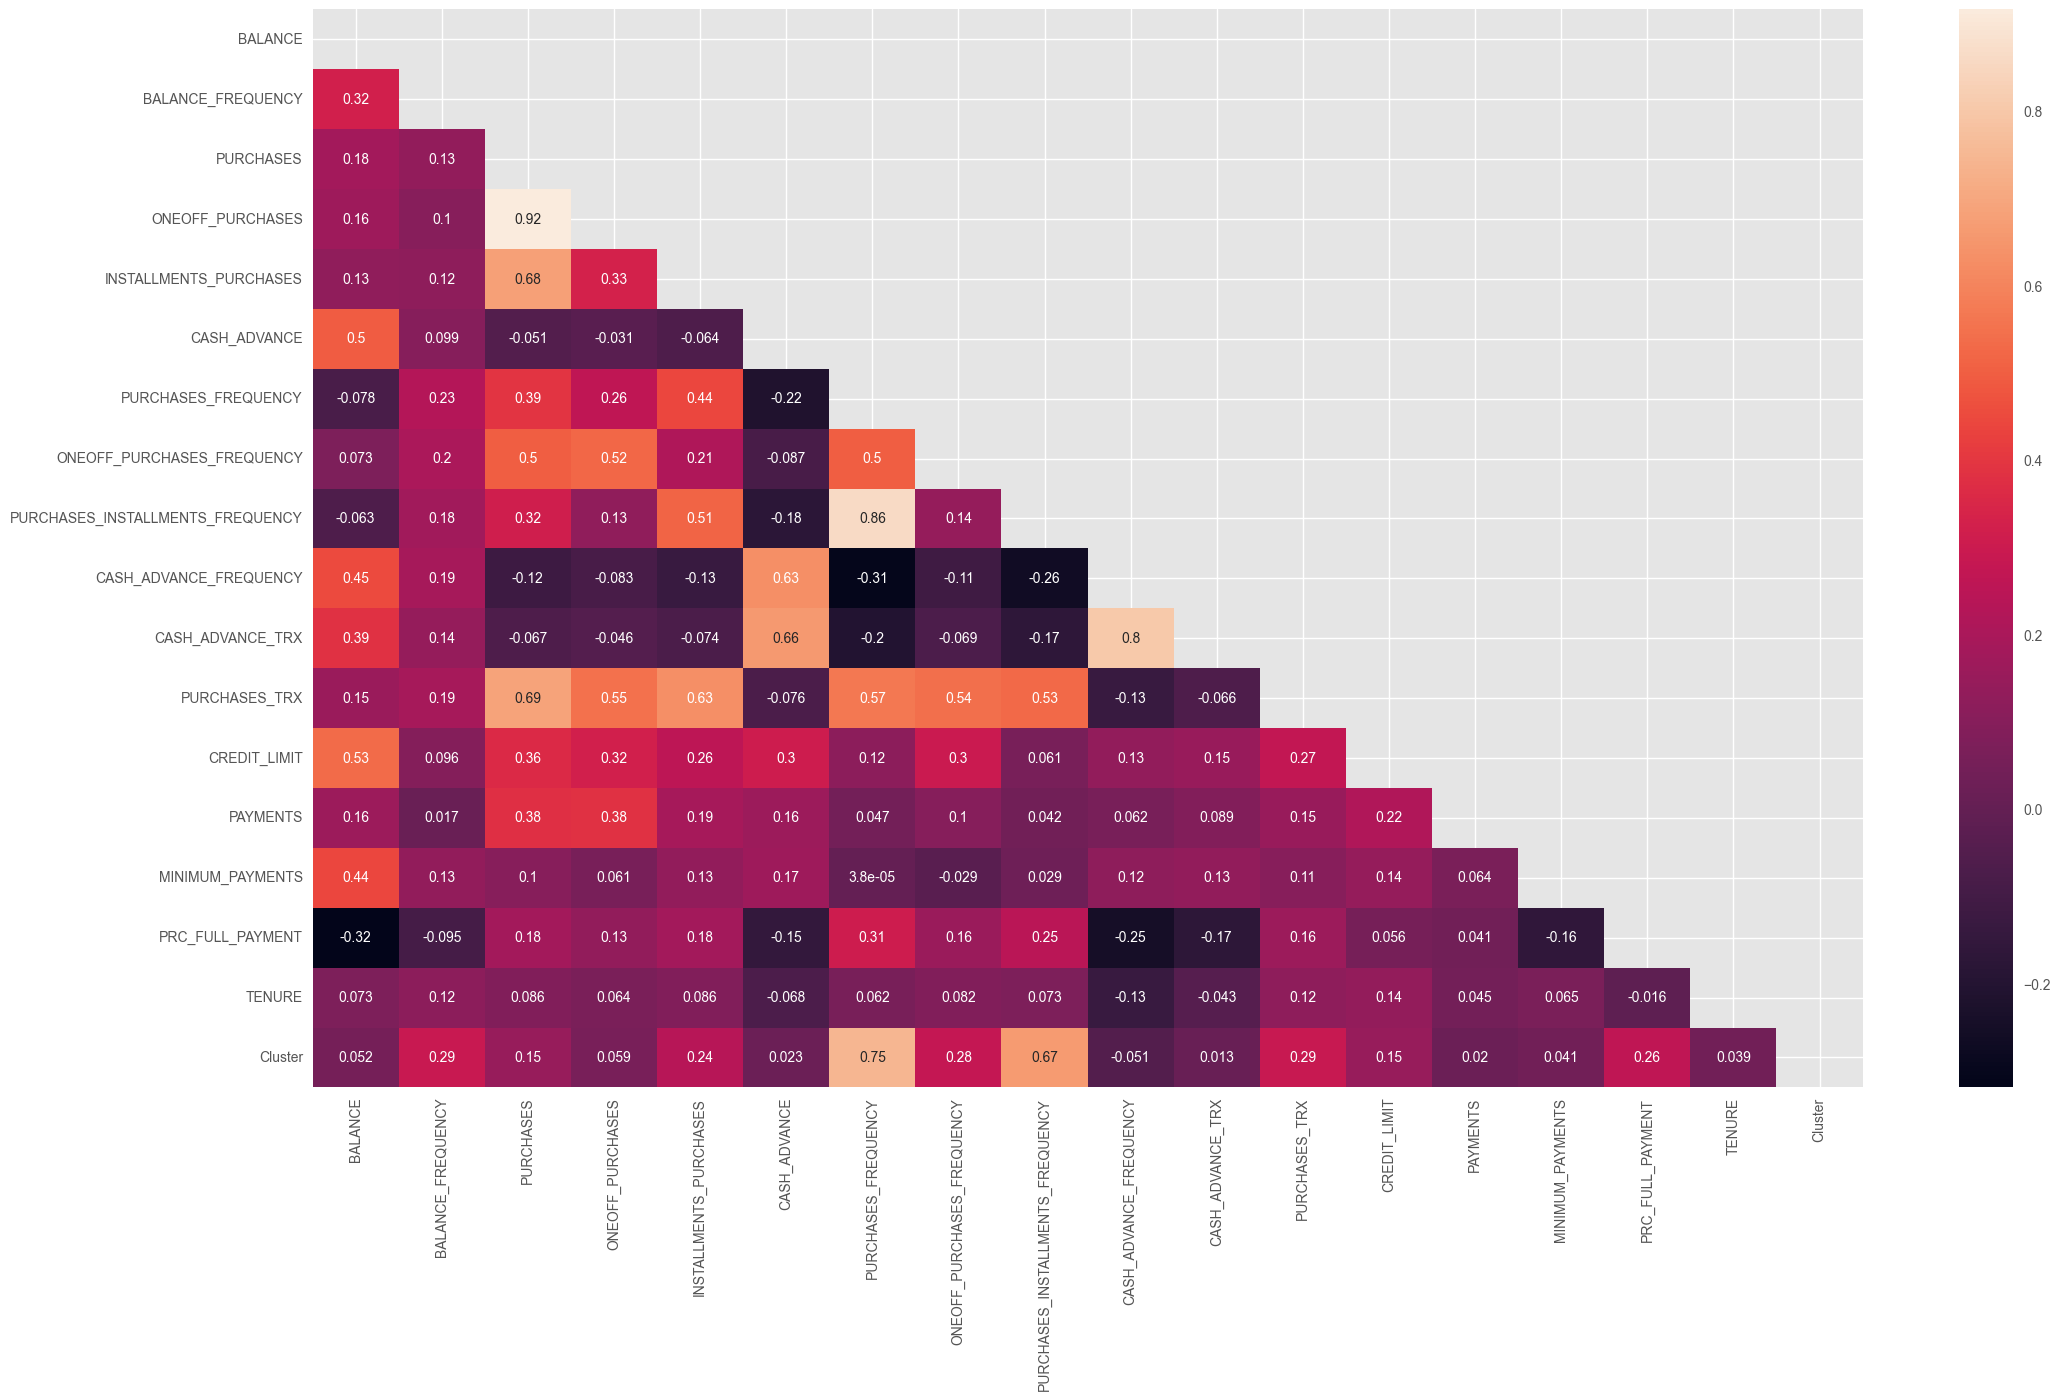

In [43]:
def plot_correlation_matrix(df: pd.DataFrame) -> None:
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(25, 14))
    sns.set_palette('muted')
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(df.corr(), annot=True, ax=ax,mask=mask)

    plt.show()


plot_correlation_matrix(data)

### [4.1. Average monthly purchases and Cash Advance Amount]()  


In [44]:
def add_monthly_averages(df: pd.DataFrame) -> pd.DataFrame:

    df['Monthly_avg_purchases'] = df['PURCHASES'] / df['TENURE']
    df['Monthly_cash_advanced'] = df['CASH_ADVANCE'] / df['TENURE']

    return df

eda = add_monthly_averages(eda.copy())
eda.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster,Monthly_avg_purchases,Monthly_cash_advanced
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0,7.950000,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2,0.000000,536.912124
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3,64.430833,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0,124.916667,17.149001
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0,1.333333,0.000000


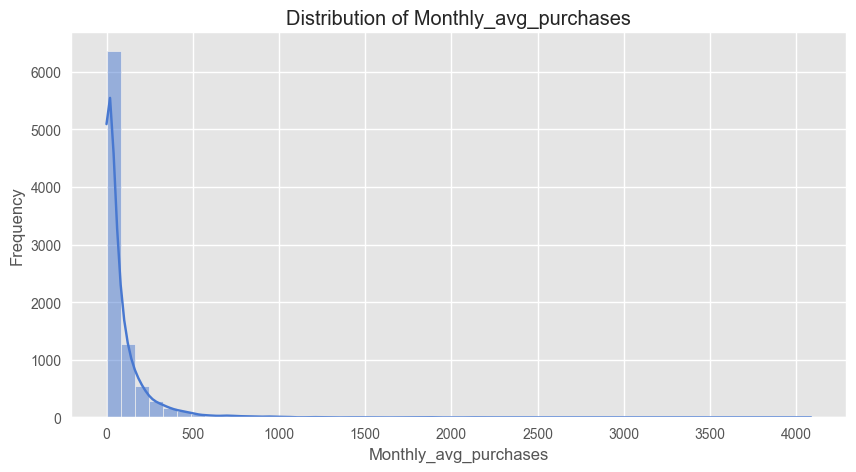

In [45]:
plt.figure(figsize=(10, 5))
sns.histplot(eda['Monthly_avg_purchases'], bins=50, kde=True)
plt.title('Distribution of Monthly_avg_purchases')
plt.xlabel('Monthly_avg_purchases')
plt.ylabel('Frequency')
plt.show()

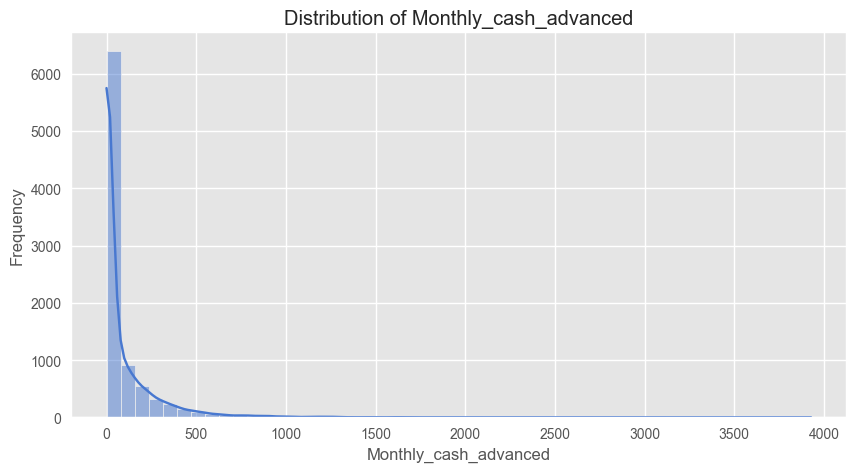

In [46]:
plt.figure(figsize=(10, 5))
sns.histplot(eda['Monthly_cash_advanced'], bins=50, kde=True)
plt.title('Distribution of Monthly_cash_advanced')
plt.xlabel('Monthly_cash_advanced')
plt.ylabel('Frequency')
plt.show()

### [4.2. What type of purchases customers are making on credit card ?]() 

In [47]:
eda[eda['ONEOFF_PURCHASES']==0]['ONEOFF_PURCHASES'].count()

4302

In [48]:
eda.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].head(10)\
                                                        .style\
                                                        .background_gradient()

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.000000,95.400000
1,0.000000,0.000000
2,773.170000,0.000000
3,1499.000000,0.000000
4,16.000000,0.000000
5,0.000000,1333.280000
6,6402.630000,688.380000
7,0.000000,436.200000
8,661.490000,200.000000
9,1281.600000,0.000000


In [49]:
eda[(eda['ONEOFF_PURCHASES']==0) & (eda['INSTALLMENTS_PURCHASES']==0)].shape


(2042, 20)

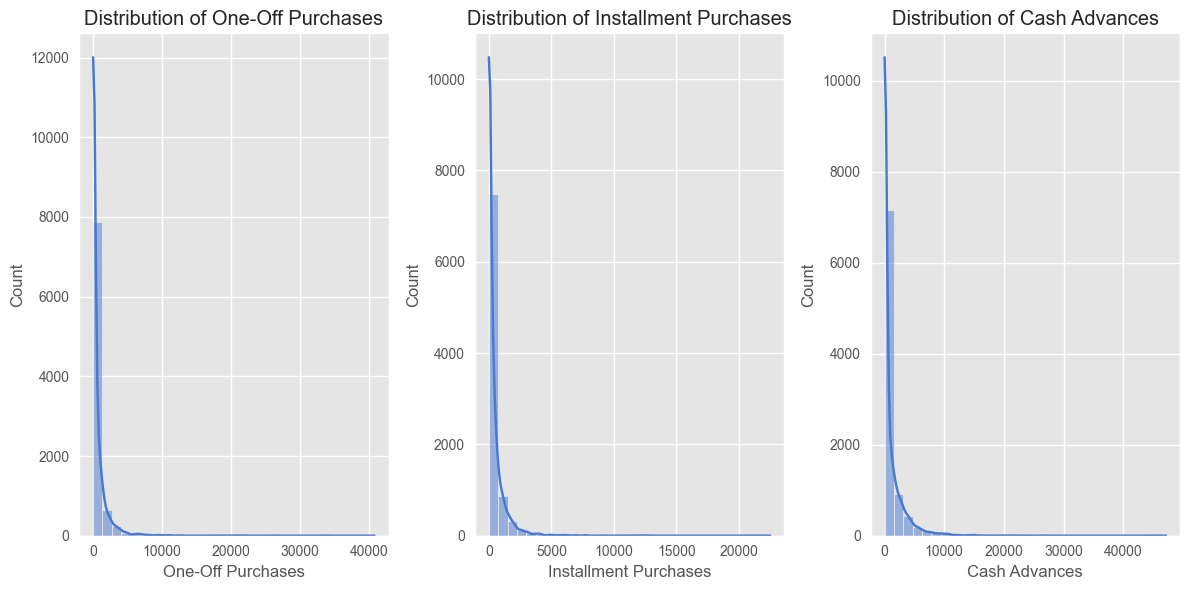

In [50]:
plt.figure(figsize=(12, 6))

# Histogram for ONEOFF_PURCHASES
plt.subplot(1, 3, 1)
sns.histplot(eda['ONEOFF_PURCHASES'], bins=30, kde=True)
plt.title('Distribution of One-Off Purchases')
plt.xlabel('One-Off Purchases')

# Histogram for INSTALLMENTS_PURCHASES
plt.subplot(1, 3, 2)
sns.histplot(eda['INSTALLMENTS_PURCHASES'], bins=30, kde=True)
plt.title('Distribution of Installment Purchases')
plt.xlabel('Installment Purchases')

# Histogram for CASH_ADVANCE
plt.subplot(1, 3, 3)
sns.histplot(eda['CASH_ADVANCE'], bins=30, kde=True)
plt.title('Distribution of Cash Advances')
plt.xlabel('Cash Advances')

plt.tight_layout()
plt.show()

In [51]:
print(f"Number of people who don't purchase anything via credit card: {eda[(eda['ONEOFF_PURCHASES']==0) & (eda['INSTALLMENTS_PURCHASES']==0)].shape[0]}")
print(f"Number of people who only do One-Off Purchases: {eda[(eda['ONEOFF_PURCHASES']>0) & (eda['INSTALLMENTS_PURCHASES']==0)].shape[0]}")
print(f"Number of people who only do Installments Purchases: {eda[(eda['ONEOFF_PURCHASES']==0) & (eda['INSTALLMENTS_PURCHASES']>0)].shape[0]}")
print(f"Number of people who do both: {eda[(eda['ONEOFF_PURCHASES']>0) & (eda['INSTALLMENTS_PURCHASES']>0)].shape[0]}")

Number of people who don't purchase anything via credit card: 2042
Number of people who only do One-Off Purchases: 1874
Number of people who only do Installments Purchases: 2260
Number of people who do both: 2774


In [52]:
def purchase(eda):   

    if (eda['ONEOFF_PURCHASES']==0) & (eda['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (eda['ONEOFF_PURCHASES']>0) & (eda['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (eda['ONEOFF_PURCHASES']>0) & (eda['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (eda['ONEOFF_PURCHASES']==0) & (eda['INSTALLMENTS_PURCHASES']>0):
        return 'istallment'

eda['purchase_type']= eda.apply(purchase,axis=1)
eda.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster,Monthly_avg_purchases,Monthly_cash_advanced,purchase_type
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,2,1000.0,201.802084,139.509787,0.000000,12,0,7.950000,0.000000,istallment
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,2,0.000000,536.912124,none
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,3,64.430833,0.000000,one_off
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,1,7500.0,0.000000,864.206542,0.000000,12,0,124.916667,17.149001,one_off
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,0,1.333333,0.000000,one_off


Text(0.5, 0, '')

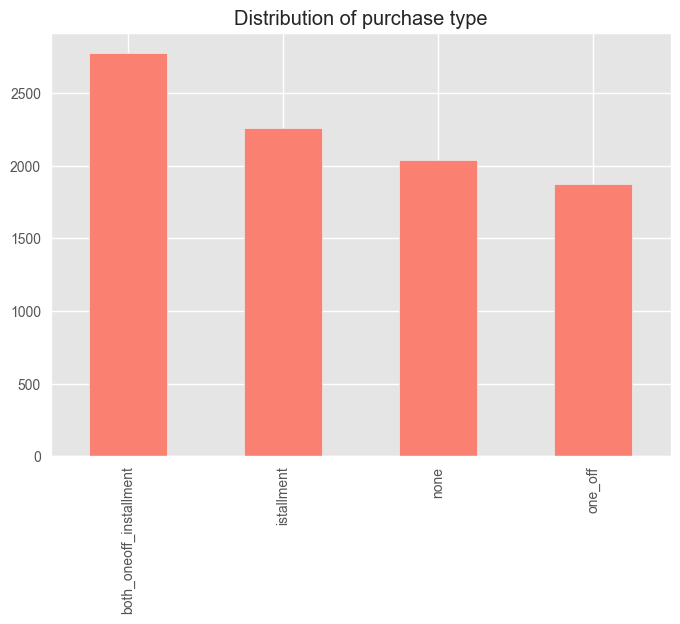

In [53]:
eda['purchase_type'].value_counts().plot(kind='bar',
                                        rot=90,
                                        title='Distribution of purchase type',
                                        color='salmon').set_xlabel('')

Observing the barplot, we can conclude that, most of customers do both oneoff and installent purchases. And the lowest method is oneoff purchases

# [5. Model Building]() 

### Feature Engineering

In [54]:
ml = data.copy()
X = ml.drop(columns=['Cluster'])

Figure 3. Optimal number of clusters


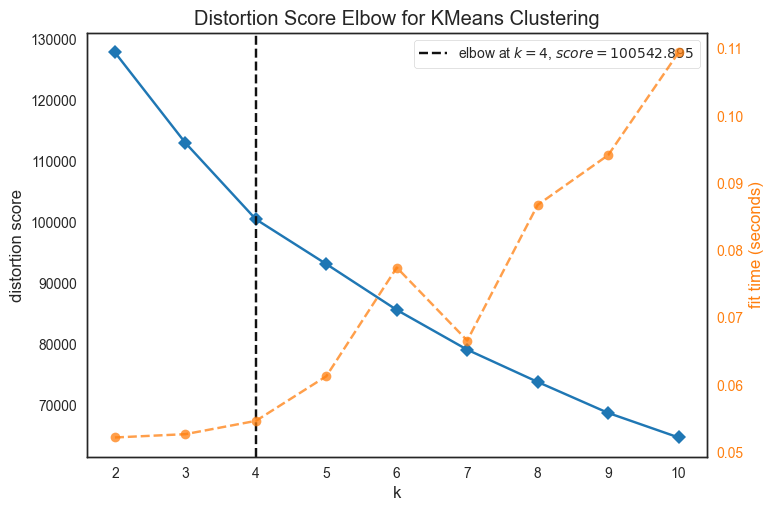

In [65]:
# Show optimal number of clusters
def optimal_number_of_clusters(df: pd.DataFrame) -> int:
    if df is None:
        return 0
    sns.set_style('white')
    sns.set_palette('tab10')

    visualizer = KElbowVisualizer(KMeans(), k=10)
    visualizer.fit(StandardScaler().fit_transform(df.values))
    visualizer.show()

    return int(visualizer.elbow_value_) if visualizer.elbow_value_ is not None else 0

print('Figure 3. Optimal number of clusters')
n_clusters = optimal_number_of_clusters(X)

This elbow plot illustrates the distortion score and fit time for KMeans clustering as the number of clusters (k) varies from 2 to 10. The distortion score decreases significantly until k=4, suggesting that 4 clusters is an optimal choice where adding more clusters doesn't reduce distortion as substantially. The fit time generally increases with more clusters, peaking at k=10. The chosen elbow point is at k=4, where the distortion score is 100542.902, balancing model complexity and fit time efficiently.

In [66]:
# Create a pipeline
def create_pipeline(n_clusters: int) -> Pipeline:
    return make_pipeline(StandardScaler(), KMeans(n_clusters=n_clusters))


kmeans_pipe = create_pipeline(n_clusters)

In [67]:
# Table of clusters
def table_of_clusters(df: pd.DataFrame, pipeline: Pipeline):
    pipeline.fit(df)

    original = df['Cluster'].\
        value_counts().reset_index().\
        rename(columns={
            'Cluster': 'Original Cluster', 'count': 'Original'
        })
    model = pd.DataFrame(pipeline.named_steps['kmeans'].labels_).\
        value_counts().reset_index().\
        rename(columns={
            0: 'Model Cluster', 'count': 'Model'
        })

    return pd.concat([original, model], axis=1).style \
        .background_gradient(cmap='BuGn') \
        .set_properties(**{'font-size': '10pt',
                           'width': '200px',
                           'height': '30px',
                           'text-align': 'center'}) \
        .set_table_styles([{'selector': 'th',
                            'props': [
                                ('text-align', 'center'),
                                ('font-size', '10pt')]}])\
        .set_caption('Table 4. Table of clusters')\
        .set_table_attributes('style="font-size: 16px; margin: 0 auto;"')


table_of_clusters(ml, kmeans_pipe)

,Original Cluster,Original,Model Cluster,Model
0,0,3976,1,3976
1,3,3367,0,3379
2,2,1198,2,1190
3,1,409,3,405


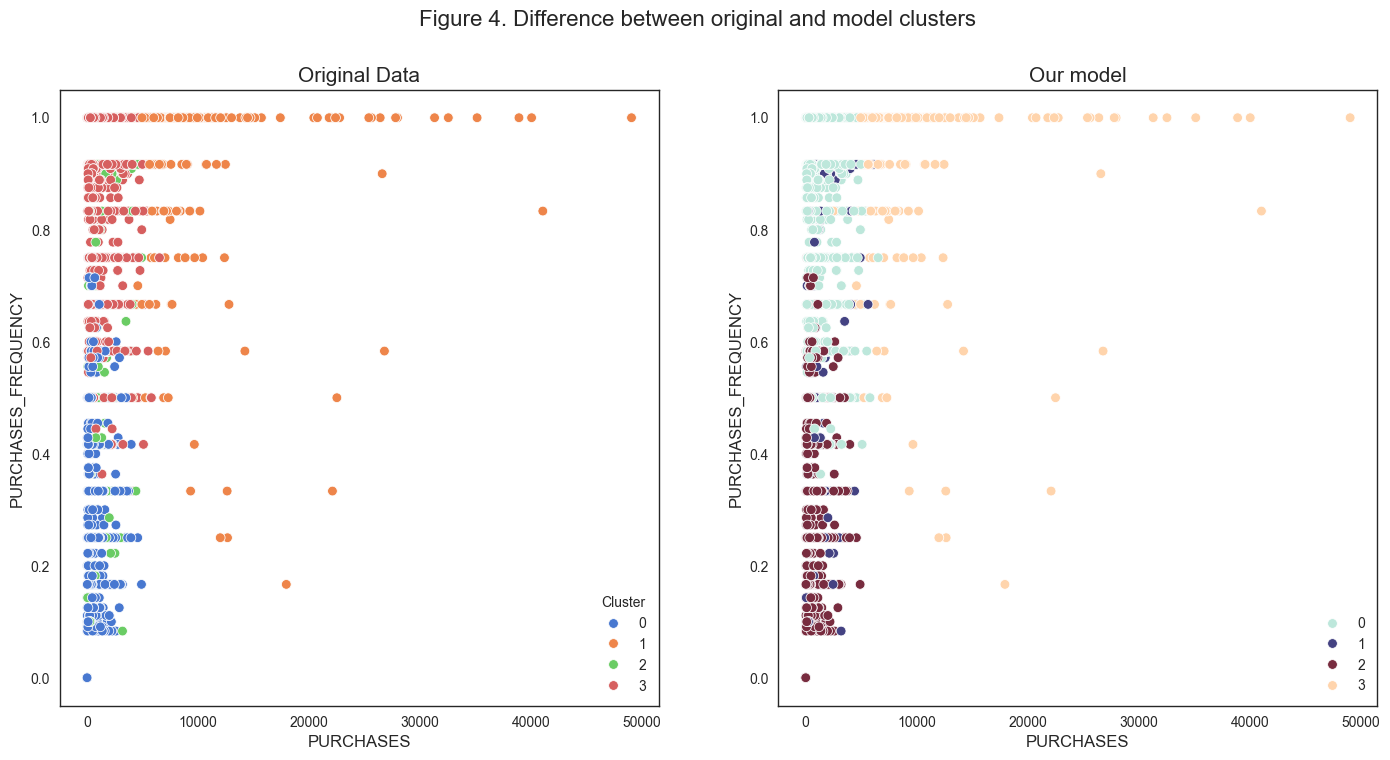

In [68]:
# Plot difference between original and model clusters
def plot_difference_between_original_and_model_clusters(df: pd.DataFrame, pipeline: Pipeline) -> None:
    pipeline.fit(df)
    fig, axes = plt.subplots(1, 2, figsize=(17, 8))

    sns.scatterplot(x='PURCHASES', 
                    y='PURCHASES_FREQUENCY', 
                    data=data, 
                    hue='Cluster', 
                    ax=axes[0], 
                    palette='muted')
    axes[0].set_title('Original Data', fontsize=15)

    sns.scatterplot(x='PURCHASES', 
                    y='PURCHASES_FREQUENCY', 
                    data=data, 
                    hue=pipeline.named_steps['kmeans'].labels_, 
                    ax=axes[1], 
                    palette='icefire')
    axes[1].set_title('Our model', fontsize=15)

    plt.suptitle('Figure 4. Difference between original and model clusters', fontsize=16)
    plt.show()


plot_difference_between_original_and_model_clusters(ml, kmeans_pipe)

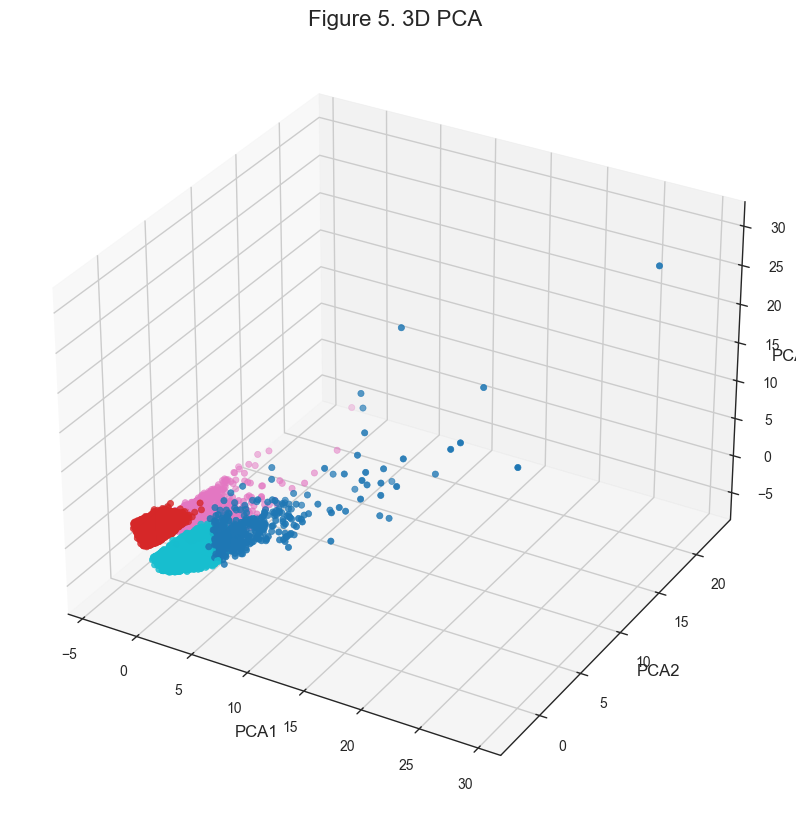

In [69]:
# 3 dimensional pca
def plot_3d_pca(df: pd.DataFrame, pipeline: Pipeline) -> None:
    pipeline.fit(df)

    pca = PCA(n_components=3)
    pca_df = pd.DataFrame(
        pca.fit_transform(
            pipeline.named_steps['standardscaler'].fit_transform(df.values)),
        columns=['PCA1', 'PCA2', 'PCA3'])
    
    sns.set_style('white')
    plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')
    ax.scatter(pca_df.PCA1, pca_df.PCA2, pca_df.PCA3, c=pipeline.named_steps['kmeans'].labels_, cmap='tab10')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')
    plt.title('Figure 5. 3D PCA', fontsize=16)
    plt.show()


plot_3d_pca(ml, kmeans_pipe)

The 3D scatter plot shows distinct clusters with minimal overlap after PCA, indicating effective dimensionality reduction and successful clustering. However, a few outliers and some within-cluster dispersion suggest minor room for improvement.

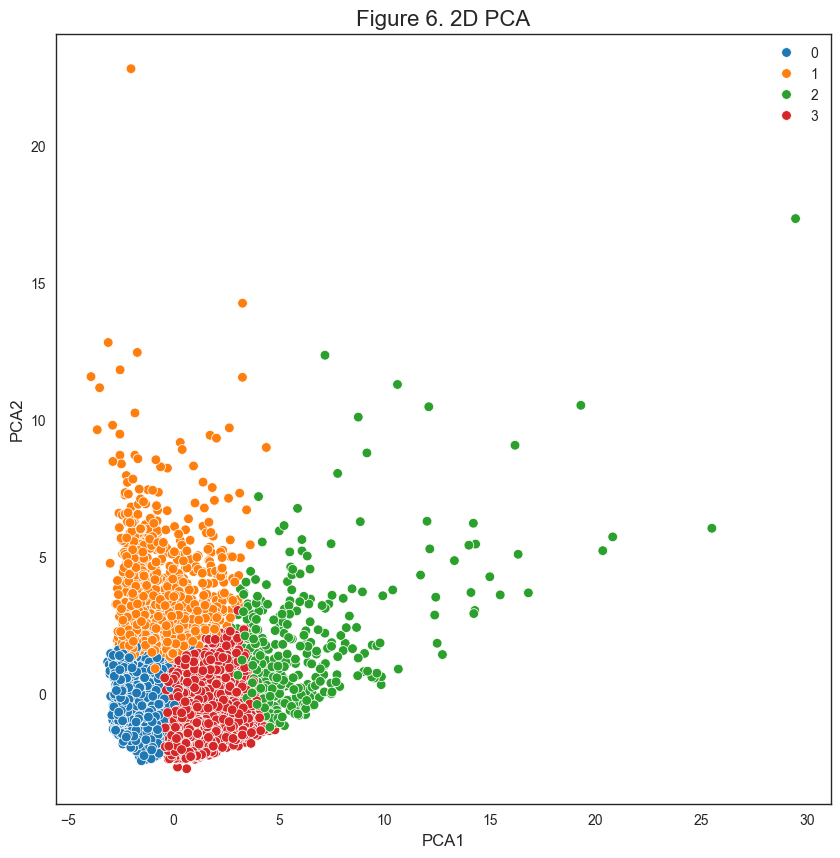

In [70]:
# 2 dimensional pca
def plot_2d_pca(df: pd.DataFrame, pipeline: Pipeline) -> None:
    pipeline.fit(df)

    pca = PCA(n_components=2)
    pca_df = pd.DataFrame(
        pca.fit_transform(
            pipeline.named_steps['standardscaler'].fit_transform(df.values)),
        columns=['PCA1', 'PCA2'])
    
    sns.set_style('white')
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x='PCA1', y='PCA2', data=pca_df, hue=pipeline.named_steps['kmeans'].labels_, palette='tab10')
    plt.title('Figure 6. 2D PCA', fontsize=16)
    plt.show()


plot_2d_pca(ml, kmeans_pipe)


The 2D PCA plot shows distinct clusters with some overlap, especially between clusters 1 (orange) and 2 (green). Clusters 0 (blue) and 3 (red) are more tightly packed, indicating clearer separation. A few outliers are present, particularly in cluster 2.

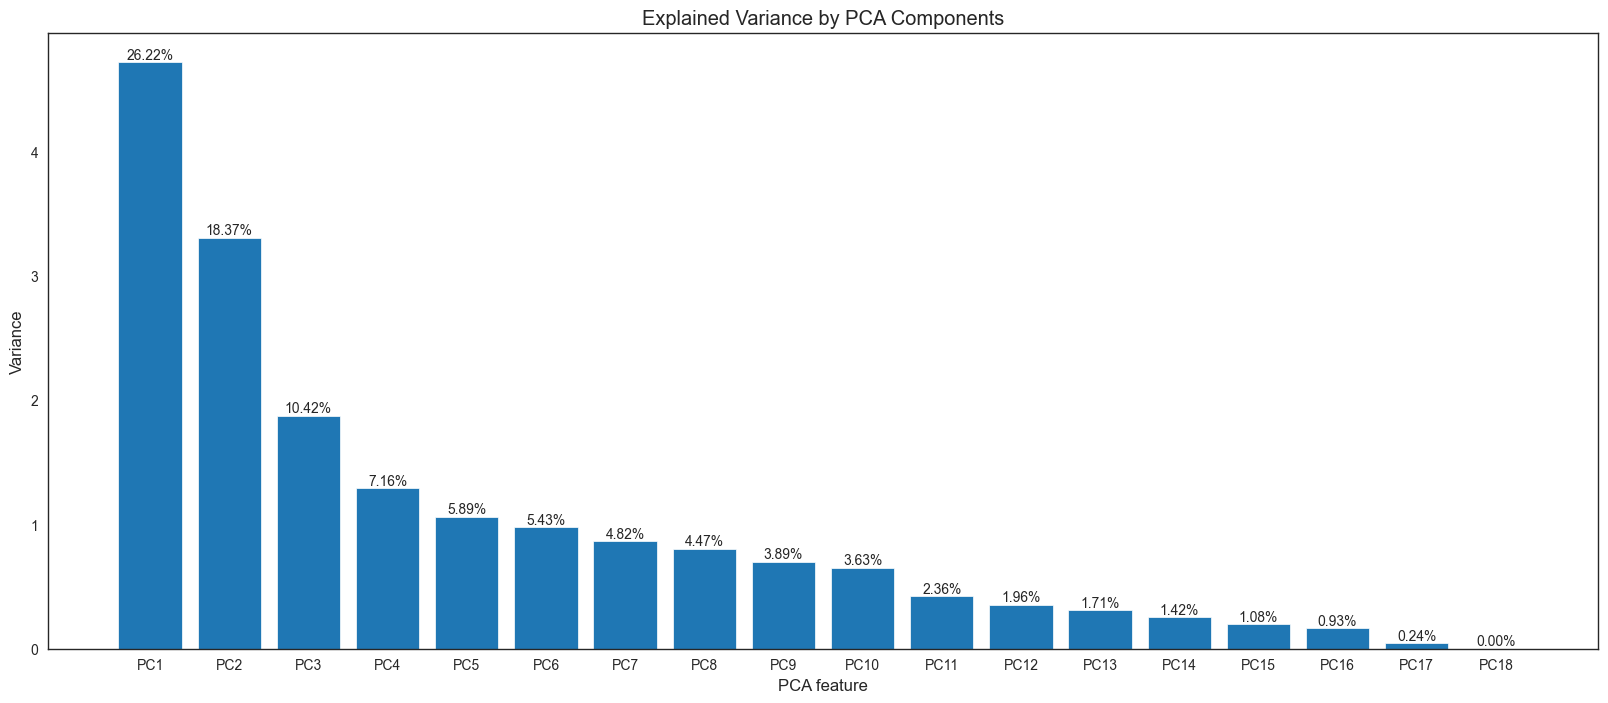

In [74]:
scaler = kmeans_pipe.named_steps['standardscaler']
scaled_data = scaler.fit_transform(ml.values)

pca = PCA(n_components=18)
pca_transformed = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

features = range(pca.n_components_)
plt.figure(figsize=(20,8))
plt.bar(features, explained_variance, tick_label=[f'PC{i+1}' for i in features])

for i, (var, ratio) in enumerate(zip(explained_variance, explained_variance_ratio)):
    plt.text(i, var, f'{ratio:.2%}', ha='center', va='bottom')

plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title('Explained Variance by PCA Components')
plt.show()

To achieve the goal of explaining about 70% of the variability in the data, choosing 5 Principal Components (PCs) is a reasonable choice. From the graph, we see that the first 5 PCs explain 26.22%, 18.37%, 10.42%, 7.16%, and 5.89% of the variation, respectively, for a total of 68.06%. Although the cumulative variance has not reached the 70% threshold, it is still close to the goal and reduces the dimensionality of the data from the original to 5 dimensions, retaining most of the necessary information. If you want to be more accurate and exceed the target of 70%, you can add PC6, which explains an additional 5.43%, bringing the total explained variance to 73.49%. However, with 68.06% of the variation explained by the first 5 PCs, this choice strikes a good balance between reducing model complexity and maximizing the amount of information retained, making it suitable for Use effective data analysis and modeling.

# [6. Discussion & Conclusion]()

- The KMeans clustering model has been successfully trained to identify distinct groups within the dataset. The optimal number of clusters was determined using the elbow method, which indicated that four clusters provide a good balance between minimizing distortion and computational efficiency.
- The table of clusters shows a clear mapping between the original and model clusters, suggesting that the KMeans model has accurately captured the underlying patterns in the data. The elbow plot further supports the choice of k=4, showing a substantial reduction in distortion score and manageable computational cost.
- Overall, the clustering model performs well, effectively grouping the data into meaningful clusters. This allows for better understanding and analysis of the dataset, enabling more informed decision-making based on the identified clusters.


In [78]:
# Save K-Means model
def save_kmeans_model(df: pd.DataFrame, pipeline: Pipeline, path: str) -> None:
    pipeline.fit(df)
    pickle.dump(pipeline, open(path, 'wb'))


KMEANS_PATH = 'kmeans'
save_kmeans_model(ml, kmeans_pipe, KMEANS_PATH)

In [79]:
# Load K-Means model
def load_kmeans_model(path: str) -> Pipeline:
    return pickle.load(open(path, 'rb'))
load_kmeans_model(KMEANS_PATH)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4))])